# Simple Linear Regression Model 

In [ ]:
# the data set contrins the year of exprience of employee and their corrospending salary 
# train a simple LinearRegression Model to predict the sallary of employee's

In [9]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Salary_Data.csv')


In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
# check info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [11]:
df.isnull().sum()
# there is no null  values to remove or replace 

YearsExperience    0
Salary             0
dtype: int64

In [13]:
 # check duplicate 
df.duplicated().sum()

0

In [14]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

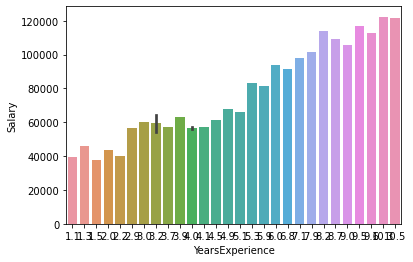

In [22]:
sns.barplot(x='YearsExperience',y = 'Salary',data = df)

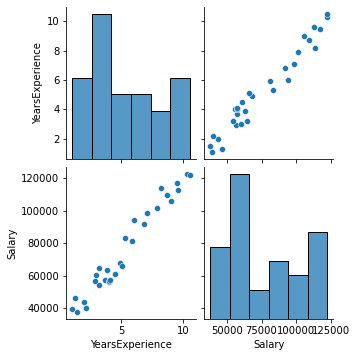

In [10]:
sns.pairplot(df)

In [25]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:>

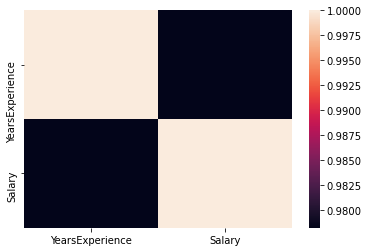

In [26]:
sns.heatmap(df.corr())

In [163]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

In [185]:
x = df['YearsExperience']
y = df['Salary']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=10)

In [186]:
x_train = np.array(x_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

In [187]:
y_test

array([[ 91738.],
       [ 54445.],
       [ 56642.],
       [ 37731.],
       [ 43525.],
       [ 98273.],
       [ 57081.],
       [112635.],
       [ 56957.]])

In [188]:
linreg = LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [191]:
# # prediction on trained dataset 
train_pred = linreg.predict(x_train)
train_pred

array([[ 39301.57603449],
       [ 83030.18489473],
       [ 69074.24589678],
       [ 82099.78896153],
       [ 55118.30689883],
       [ 64422.2662308 ],
       [103498.89542506],
       [108150.87509104],
       [123037.21002219],
       [100707.70762547],
       [ 63491.8702976 ],
       [115594.04255662],
       [124898.00188858],
       [ 56979.09876522],
       [110942.06289063],
       [ 74656.62149596],
       [ 76517.41336235],
       [ 37440.78416809],
       [ 72795.82962957],
       [ 47675.13943326],
       [ 61631.07843121]])

In [204]:
linreg.score(prediction,y_train)
# this is the worse model because score is negative even thought on the train data 
# model is underfitting 

-831468856.0798625

In [203]:
prediction = linreg.predict(x_train)
error = pd.DataFrame(np.array(y_train),columns = ['Actual'])
error['predicted_values'] = np.array(prediction)
error

,Actual,predicted_values
0,46205.0,39301.576034
1,93940.0,83030.184895
2,61111.0,69074.245897
3,81363.0,82099.788962
4,60150.0,55118.306899
5,55794.0,64422.266231
6,113812.0,103498.895425
7,109431.0,108150.875091
8,122391.0,123037.210022
9,101302.0,100707.707625


In [206]:
linreg.score(prediction,y_train)

-831468856.0798625

In [116]:
# calculate standard error
s = 0
for val1 in error['Actual']:
    for val2 in error['predicted_values']:
        s+=(val1 - val2)**2
print(s/(len(error['Actual'])))

12673661261.181128


# bias ,varience ,overfitting and underfitting condition 

In [207]:
# underfitting : when the error is high in traing data itself then the model in underfitting 
# as we can see the above that our model is underfitting 

In [ ]:
# overfitting : when the accuracy is very high in case of traing data but the accuracy goes down when apply on test data
# because model is trying to fit each and every point with best accuracy on training data set that might be not best fit 
# for test data set


In [ ]:
 # bias and varience in Regression problems


# bias -> error of traing data 
# varience -> error of training data 

# in case of underfitting the bias is high and varience is also high 
# basically the error is high in training data as well as test data that's why it's high bias and high varience 

# in cse of overfitting bias is low and varience is high
# basically the error is low on traing data set but the error is high on test data set that's whay it's low bias high varience

# in case of best fit model : low bias and low varience becasue the error is low in both cases

In [ ]:
# bias and varience in classification problems